In [11]:
!jupyter nbextension enable --py --sys-prefix widgetsnbextension
!jupyter nbextension enable --py --sys-prefix gmaps

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok
Enabling notebook extension jupyter-gmaps/extension...
      - Validating: ok


In [19]:
import os
import sys
import json
import time
import glob
import pandas as pd
import numpy as np
import requests
import gmaps
import matplotlib as mpl
import matplotlib.pylab as pl
from collections import defaultdict
from matplotlib import pyplot as plt
from datetime import datetime, date, time, timedelta


In [20]:
from config import API_KEY

In [21]:
gmaps.configure(api_key=API_KEY)

In [22]:
# file path with glob
path="csv files/parking 2016-2020"
all_files = glob.glob(path + "/*.csv")
all_files

['csv files/parking 2016-2020\\Parking_Tags_Data_2016_1.csv',
 'csv files/parking 2016-2020\\Parking_Tags_Data_2016_2.csv',
 'csv files/parking 2016-2020\\Parking_Tags_Data_2016_3.csv',
 'csv files/parking 2016-2020\\Parking_Tags_Data_2016_4.csv',
 'csv files/parking 2016-2020\\Parking_Tags_Data_2017_1.csv',
 'csv files/parking 2016-2020\\Parking_Tags_Data_2017_2.csv',
 'csv files/parking 2016-2020\\Parking_Tags_Data_2017_3.csv',
 'csv files/parking 2016-2020\\Parking_Tags_Data_2018_1.csv',
 'csv files/parking 2016-2020\\Parking_Tags_Data_2018_2.csv',
 'csv files/parking 2016-2020\\Parking_Tags_Data_2018_3.csv',
 'csv files/parking 2016-2020\\Parking_Tags_Data_2019.000.csv',
 'csv files/parking 2016-2020\\Parking_Tags_Data_2019.001.csv',
 'csv files/parking 2016-2020\\Parking_Tags_Data_2019.002.csv',
 'csv files/parking 2016-2020\\Parking_Tags_Data_2019.003.csv',
 'csv files/parking 2016-2020\\Parking_Tags_Data_2019.004.csv',
 'csv files/parking 2016-2020\\Parking_Tags_Data_2019.005.cs

In [23]:
li = []
for filename in all_files:
    parking_df = pd.read_csv(filename, index_col=None, header=0)
    li.append(parking_df)
li    

[       tag_number_masked  date_of_infraction  infraction_code  \
 0               ***03850            20160101               29   
 1               ***03851            20160101               29   
 2               ***98221            20160101               29   
 3               ***85499            20160101               29   
 4               ***03852            20160101              406   
 ...                  ...                 ...              ...   
 749995          ***02250            20160429              210   
 749996          ***02812            20160429              192   
 749997          ***08867            20160429                5   
 749998          ***09427            20160429              406   
 749999          ***11263            20160429              210   
 
                 infraction_description  set_fine_amount  time_of_infraction  \
 0       PARK PROHIBITED TIME NO PERMIT               30                 0.0   
 1       PARK PROHIBITED TIME NO PERMIT       

In [24]:
parking_df= pd.concat(li, axis=0, ignore_index= True)
parking_df

,tag_number_masked,date_of_infraction,infraction_code,infraction_description,set_fine_amount,time_of_infraction,location1,location2,location3,location4,province
0,***03850,20160101,29.0,PARK PROHIBITED TIME NO PERMIT,30,0.0,NR,49 GLOUCESTER ST,NaN,NaN,ON
1,***03851,20160101,29.0,PARK PROHIBITED TIME NO PERMIT,30,1.0,NR,45 GLOUCESTER ST,NaN,NaN,ON
2,***98221,20160101,29.0,PARK PROHIBITED TIME NO PERMIT,30,2.0,NR,274 GEORGE ST,NaN,NaN,ON
3,***85499,20160101,29.0,PARK PROHIBITED TIME NO PERMIT,30,2.0,NR,270 GEORGE ST,NaN,NaN,ON
4,***03852,20160101,406.0,PARK-VEH. W/O VALID ONT PLATE,40,2.0,NR,45 GLOUCESTER ST,NaN,NaN,ON
...,...,...,...,...,...,...,...,...,...,...,...
10060872,***42841,20201231,347.0,PARK IN A FIRE ROUTE,250,2341.0,NaN,325 BOGERT AVE,NaN,NaN,ON
10060873,***18794,20201231,3.0,PARK ON PRIVATE PROPERTY,30,2351.0,AT,12 YONGE ST,NaN,NaN,ON
10060874,***36469,20201231,3.0,PARK ON PRIVATE PROPERTY,30,NaN,NaN,40 PANORAMA CT,NaN,NaN,ON
10060875,***38382,20201231,3.0,PARK ON PRIVATE PROPERTY,30,NaN,NaN,155 REDPATH AVE,NaN,NaN,ON


In [25]:
parking_df.dtypes

tag_number_masked          object
date_of_infraction          int64
infraction_code           float64
infraction_description     object
set_fine_amount             int64
time_of_infraction        float64
location1                  object
location2                  object
location3                  object
location4                  object
province                   object
dtype: object

In [26]:
#parking_df.isnull()

In [27]:
#parking_df.dropna(inplace=True)

In [28]:
#parking_df.isna().sum()

In [29]:
parking_df.count()

tag_number_masked         10060877
date_of_infraction        10060877
infraction_code           10060875
infraction_description    10060877
set_fine_amount           10060877
time_of_infraction        10053404
location1                  9099242
location2                 10059720
location3                   699263
location4                   701513
province                  10060874
dtype: int64

In [30]:
parking_df['date_of_infraction'] = pd.to_datetime(parking_df['date_of_infraction'],format='%Y%m%d')
parking_df

,tag_number_masked,date_of_infraction,infraction_code,infraction_description,set_fine_amount,time_of_infraction,location1,location2,location3,location4,province
0,***03850,2016-01-01,29.0,PARK PROHIBITED TIME NO PERMIT,30,0.0,NR,49 GLOUCESTER ST,NaN,NaN,ON
1,***03851,2016-01-01,29.0,PARK PROHIBITED TIME NO PERMIT,30,1.0,NR,45 GLOUCESTER ST,NaN,NaN,ON
2,***98221,2016-01-01,29.0,PARK PROHIBITED TIME NO PERMIT,30,2.0,NR,274 GEORGE ST,NaN,NaN,ON
3,***85499,2016-01-01,29.0,PARK PROHIBITED TIME NO PERMIT,30,2.0,NR,270 GEORGE ST,NaN,NaN,ON
4,***03852,2016-01-01,406.0,PARK-VEH. W/O VALID ONT PLATE,40,2.0,NR,45 GLOUCESTER ST,NaN,NaN,ON
...,...,...,...,...,...,...,...,...,...,...,...
10060872,***42841,2020-12-31,347.0,PARK IN A FIRE ROUTE,250,2341.0,NaN,325 BOGERT AVE,NaN,NaN,ON
10060873,***18794,2020-12-31,3.0,PARK ON PRIVATE PROPERTY,30,2351.0,AT,12 YONGE ST,NaN,NaN,ON
10060874,***36469,2020-12-31,3.0,PARK ON PRIVATE PROPERTY,30,NaN,NaN,40 PANORAMA CT,NaN,NaN,ON
10060875,***38382,2020-12-31,3.0,PARK ON PRIVATE PROPERTY,30,NaN,NaN,155 REDPATH AVE,NaN,NaN,ON


In [31]:
parking_df.dtypes

tag_number_masked                 object
date_of_infraction        datetime64[ns]
infraction_code                  float64
infraction_description            object
set_fine_amount                    int64
time_of_infraction               float64
location1                         object
location2                         object
location3                         object
location4                         object
province                          object
dtype: object

In [32]:
parking_df.count()

tag_number_masked         10060877
date_of_infraction        10060877
infraction_code           10060875
infraction_description    10060877
set_fine_amount           10060877
time_of_infraction        10053404
location1                  9099242
location2                 10059720
location3                   699263
location4                   701513
province                  10060874
dtype: int64

In [38]:
parking_df.groupby('infraction_code').count()

,tag_number_masked,date_of_infraction,infraction_description,set_fine_amount,time_of_infraction,location1,location2,location3,location4,province
infraction_code,,,,,,,,,,
1.0,6628,6628,6628,6628,6627,6601,6628,749,750,6628
2.0,564639,564639,564639,564639,564628,564534,564638,43301,43304,564639
3.0,1924583,1924583,1924583,1924583,1919147,1192417,1923827,380,1031,1924580
4.0,90472,90472,90472,90472,90104,10111,90410,61,110,90472
5.0,1657565,1657565,1657565,1657565,1657390,1655790,1657530,168095,168438,1657565
...,...,...,...,...,...,...,...,...,...,...
430.0,16,16,16,16,16,16,16,7,4,16
432.0,1,1,1,1,1,1,1,0,0,1
434.0,80,80,80,80,80,80,80,0,0,80


In [39]:
new_parking_df= parking_df.groupby(['infraction_code','infraction_description','location2'])['location2'].count().reset_index(name='count')
new_parking_df

,infraction_code,infraction_description,location2,count
0,1.0,PARK AT EXPIRED METER,15 5600 SHEPPARD AVE E,1
1,1.0,PARK AT EXPIRED METER,890 WILLOWDALE AVE,1
2,1.0,PARK FAIL TO DEPOSIT FEE METER,0555 RUSSELL RD,1
3,1.0,PARK FAIL TO DEPOSIT FEE METER,1 ATLANTIC AVE,2
4,1.0,PARK FAIL TO DEPOSIT FEE METER,1 BROOKDALE AVE,5
...,...,...,...,...
911266,435.0,PARK ELECT. VEH. NOT CONNECTED,30 THE QUEENSWAY,2
911267,435.0,PARK ELECT. VEH. NOT CONNECTED,8 PALMERSTON AVE,4
911268,435.0,PARK ELECT. VEH. NOT CONNECTED,8 PORTLAND ST,1
911269,437.0,PARK PRIVATE VEHICLE ON SITE,800 BOROUGH DR,1


In [40]:

new_parking_max_df= new_parking_df.groupby(['infraction_code']).max()['count'].reset_index(name='count')
new_parking_max_df

,infraction_code,count
0,1.0,268
1,2.0,1446
2,3.0,23353
3,4.0,6901
4,5.0,12278
...,...,...
215,430.0,2
216,432.0,1
217,434.0,28
218,435.0,4


In [41]:
final_parking_df= pd.merge(new_parking_df, new_parking_max_df, how='inner',on=['infraction_code','count'])
final_parking_df

,infraction_code,infraction_description,location2,count
0,1.0,PARK FAIL TO DEPOSIT FEE METER,42 TARLTON RD,268
1,2.0,PARK - LONGER THAN 3 HOURS,12 SUDBURY ST,1446
2,3.0,PARK ON PRIVATE PROPERTY,2075 BAYVIEW AVE,23353
3,4.0,PARK ON MUNICIPAL PROPERTY,18 HENDON AVE,6901
4,5.0,PARK-SIGNED HWY-PROHIBIT DY/TM,20 EDWARD ST,12278
...,...,...,...,...
445,432.0,PARK MOTORCYCLE-METER-GT 60DEG,1 BYNG AVE,1
446,434.0,PARK IN ELECTRIC VEHICLE SPACE,8 PALMERSTON AVE,28
447,435.0,PARK ELECT. VEH. NOT CONNECTED,8 PALMERSTON AVE,4
448,437.0,PARK PRIVATE VEHICLE ON SITE,800 BOROUGH DR,1


In [42]:
parking_top20_df= final_parking_df.sort_values(['count'],ascending=False)
parking_top20_df

,infraction_code,infraction_description,location2,count
2,3.0,PARK ON PRIVATE PROPERTY,2075 BAYVIEW AVE,23353
4,5.0,PARK-SIGNED HWY-PROHIBIT DY/TM,20 EDWARD ST,12278
261,257.0,PARK CONTRARY POSTED CONDITION,1 BRIMLEY RD S,11034
242,207.0,PARK MACHINE-REQD FEE NOT PAID,15 MARINE PARADE DR,8204
431,417.0,STAND VEH.-PSGR LD ZN LD/UNLD,273 BLOOR ST W,7799
...,...,...,...,...
173,73.0,STOP-ADJACENT CNTRE STRIP SIDE,80 FRONT ST E,1
172,73.0,STOP-ADJACENT CNTRE STRIP SIDE,638 TRETHEWEY DR,1
171,73.0,STOP-ADJACENT CNTRE STRIP SIDE,505 UNIVERSITY AVE,1
170,73.0,STOP-ADJACENT CNTRE STRIP SIDE,100 FRONT ST W,1


In [43]:
parking_top20_df.head(20)

,infraction_code,infraction_description,location2,count
2,3.0,PARK ON PRIVATE PROPERTY,2075 BAYVIEW AVE,23353
4,5.0,PARK-SIGNED HWY-PROHIBIT DY/TM,20 EDWARD ST,12278
261,257.0,PARK CONTRARY POSTED CONDITION,1 BRIMLEY RD S,11034
242,207.0,PARK MACHINE-REQD FEE NOT PAID,15 MARINE PARADE DR,8204
431,417.0,STAND VEH.-PSGR LD ZN LD/UNLD,273 BLOOR ST W,7799
8,9.0,STOP-SIGNED HWY-PROHIBIT TM/DY,42 CHARLES ST E,6953
3,4.0,PARK ON MUNICIPAL PROPERTY,18 HENDON AVE,6901
7,8.0,STAND VEH.-PROHIBIT TIME/DAY,19 GRAND TRUNK CRES,5352
83,29.0,PARK PROHIBITED TIME NO PERMIT,100 MAITLAND ST,4329
211,134.0,PARK-SIGNED HWY-PUBLIC LANE,60 BLOOR ST W,4236


In [44]:
parking_top20_df.to_csv('parking_top20.csv',index=False, encoding='utf-8')

In [43]:
parking_df['location4'].unique()

array([nan, 'DAVENPORT RD', 'KING ST E', ...,
       'UNDERGROUND PARKING GARAGE', 'DAPHNE RD', 'LAPLANTE AVE'],
      dtype=object)

In [33]:
'''
Setting colours
http://stackoverflow.com/a/37211181/4047679
Blue: #004B85
Red: #F2756D
'''
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=['#004B85','#F2756D'])

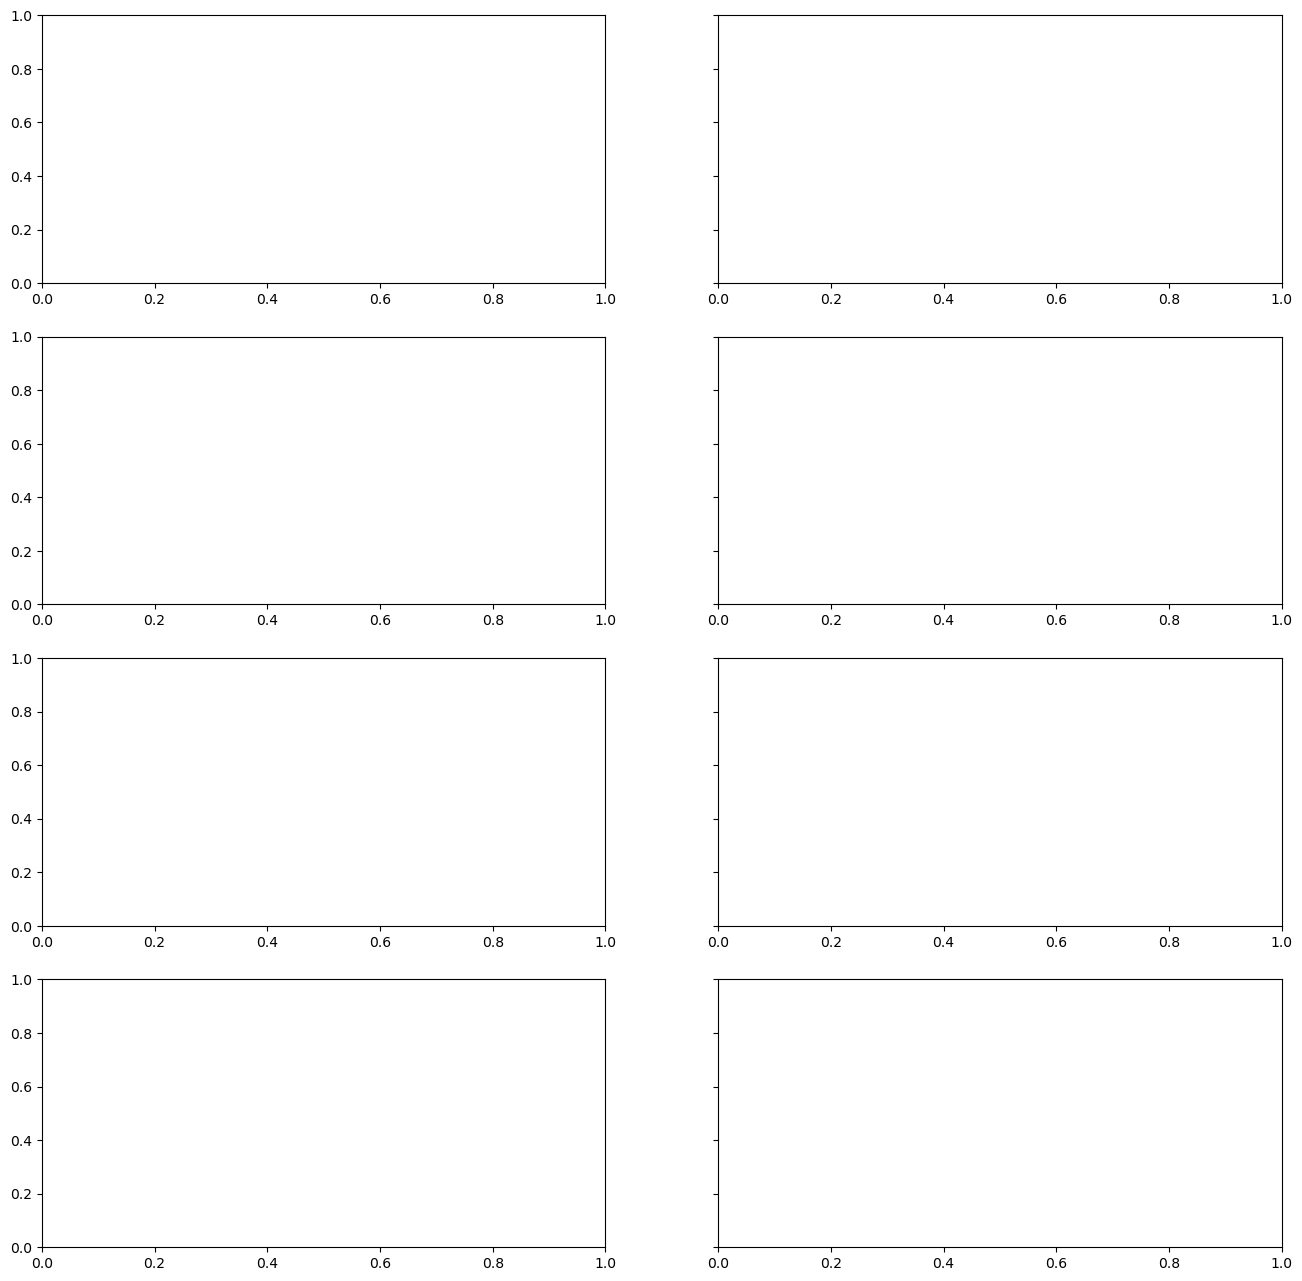

In [36]:
fig, ax=plt.subplots(4,2, figsize=(16,16), sharey=True)
#Setting colors
NUM_COLORS = 20
cm = plt.get_cmap('Paired')
color_cycler =('color',[cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])
ax_r= -1


In [39]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>